In [1]:
import sys
sys.path.append('../Modules')
"""
# read raw data and generate data/target sections

import pandas as pd
iris = pd.read_csv('https://raw.githubusercontent.com/ming-zhao/Machine-Learning/master/Data/iris.txt', header=None)
iris.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'species']
iris.head()
data = iris.iloc[:,:-1].values
target = np.where(iris.iloc[:,-1].values == 'Iris-setosa', 0, np.where(iris.iloc[:,-1].values == 'Iris-versicolor', 1, 2))
"""
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

from sklearn import datasets
from sklearn.decomposition import PCA as SKPCA
from sklearn.datasets import fetch_openml
# Load data from https://www.openml.org/d/554
from PCA import PCA

mnist_data, minist_target = fetch_openml('mnist_784', version=1, return_X_y=True)
iris_data = datasets.load_iris().data
iris_target = datasets.load_iris().target

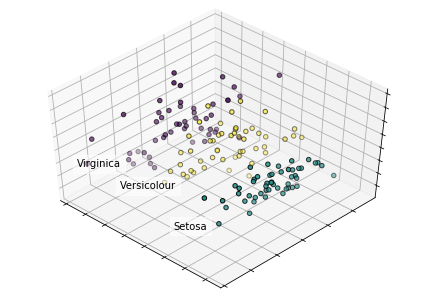

In [2]:
features = SKPCA(n_components=3).fit_transform(iris_data)

plt.clf()

fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(
        features[iris_target == label, 0].mean(),
        features[iris_target == label, 1].mean() + 1.5,
        features[iris_target == label, 2].mean(), name,
        horizontalalignment='center',
        bbox=dict(alpha=0.5, edgecolor='w', facecolor='w'))

# Reorder the labels to have colors matching the cluster results
labels = np.choose(iris_target, [1, 2, 0]).astype(np.float)
ax.scatter(features[:, 0], features[:, 1], features[:, 2], c=labels, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

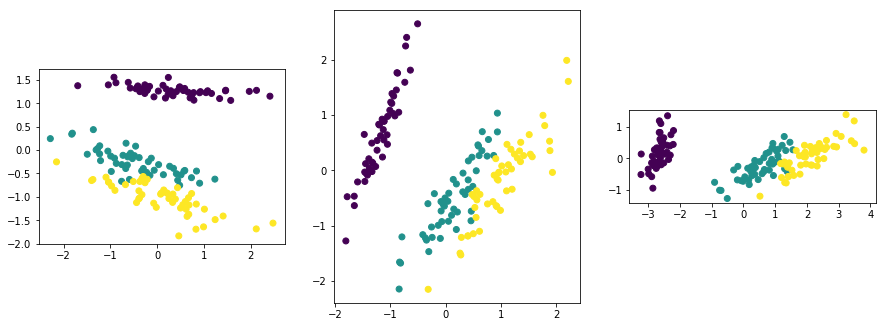

In [3]:
plt.figure(figsize=(15, 15))
Z = PCA(n_components=2).fit_transform(iris_data)
plt.subplot(131)
plt.scatter(Z[:, 0], Z[:, 1], c=iris_target)
plt.gca().set_aspect('equal', adjustable='box')

# EM algorithm for PCA
Z = PCA(n_components=2).fit_transform(iris_data, method="em")
plt.subplot(132)
plt.scatter(Z[:, 0], Z[:, 1], c=iris_target)
plt.gca().set_aspect('equal', adjustable='box')

Z = SKPCA(n_components=2).fit_transform(iris_data)
plt.subplot(133)
plt.scatter(Z[:, 0], Z[:, 1], c=iris_target)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

### High Dimensional Data

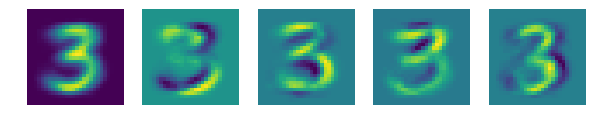

In [4]:
mnist_data3 = mnist_data[np.random.choice(np.where(minist_target == '3')[0], 200)]
pca = PCA(n_components=4)
pca.fit(mnist_data3)

plt.figure(figsize=(10, 10))
plt.subplot(1, 5, 1)
plt.imshow(pca.mean.reshape(28, 28))
plt.axis('off')
for i, w in enumerate(pca.W.T[::-1]):
    plt.subplot(1, 5, i + 2)
    plt.imshow(w.reshape(28, 28))
    plt.axis('off')
plt.show()